# Reaizado por:

**Cesar Augusto Saenz Jimenez**

**Ricardo Alejadro Giraldo**

**Laura Manuela Caro**

<h1 style="color: Red">Desicion Tree Classifirer</h1>

In [1]:
# Cargue las bibliotecas
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import pydotplus
sc = StandardScaler()

In [2]:
df = pd.read_excel("BD_TRABAJO_GRADO.xlsx",engine='openpyxl',index_col=0)
df.reset_index(drop=True, inplace=True)
df.head()

,Genero,Estado_Civil,Tpo_Contrato,Estado_Empleado,Fecha_Ingreso,Fecha_Retiro,Dias_Permanencia,Motivo_Retiro,Tipo_Cargo,Responsabilidad,Servicio_Cliente,Madurez_Emocional,Productividad,Honestidad,Compromiso,Desempeño_Seguro,ERI
0,M,NaN,Fijo,Retirado,2018-02-03,2018-02-19,16,Renuncia,Operativos y Auxiliares,42,25,20,10,23,21,37,PS
1,M,NaN,Fijo,Retirado,2018-08-02,2020-11-06,827,Renuncia,Operativos y Auxiliares,16,11,31,14,8,3,15,PS
2,M,NaN,Fijo,Retirado,2018-08-13,2019-02-07,178,Renuncia,Operativos y Auxiliares,33,22,21,13,22,20,42,PS
3,M,NaN,Fijo,Retirado,2019-02-23,2019-09-20,209,Renuncia,Operativos y Auxiliares,24,21,25,17,21,7,17,PS
4,F,NaN,Fijo,Retirado,2018-02-17,2019-07-22,520,Renuncia,Operativos y Auxiliares,40,23,31,48,25,40,23,PS


### Limpieza de datos (Data Cleaning) y preparación

In [3]:
#filtramos solo aquellos empleados que su Tipo_Cargo sean Operativos y Auxiliares que son los que representan el 90% de la data y son los que mas rotacion tienen y Elimino la variable que no aportan al modelo 
df = df.loc[df['Tipo_Cargo'] == 'Operativos y Auxiliares']
df = df.drop(["Fecha_Ingreso", "Fecha_Retiro","Tipo_Cargo","Motivo_Retiro","Estado_Civil","Dias_Permanencia"], axis=1)
#df = df.drop(["Fecha_Ingreso", "Fecha_Retiro","Tipo_Cargo","Motivo_Retiro","Dias_Permanencia"], axis=1)
#df = df.dropna(subset=['Estado_Civil']) # estoy probando si mejoro el modelo
df["Estado_Empleado"].replace({"Activo": 1, "Retirado": 0}, inplace=True) #reemplace los valores de estado del empleado asi Activos por 1 y Retirados por 0
df.sample(8)

,Genero,Tpo_Contrato,Estado_Empleado,Responsabilidad,Servicio_Cliente,Madurez_Emocional,Productividad,Honestidad,Compromiso,Desempeño_Seguro,ERI
6745,F,Indefinido,1,30,38,16,11,21,21,32,PS
2301,F,Indefinido,0,22,13,23,17,9,3,21,DP
4316,M,Fijo,0,23,17,18,14,18,1,16,DP
5170,M,Fijo,0,24,16,16,17,15,1,20,DP
3173,M,Indefinido,0,43,28,29,10,19,18,23,PS
1069,M,Fijo,0,31,12,10,7,15,48,20,PS
1858,F,Fijo,0,24,17,4,7,16,11,32,DP
751,M,Fijo,0,11,37,18,9,15,7,20,DP


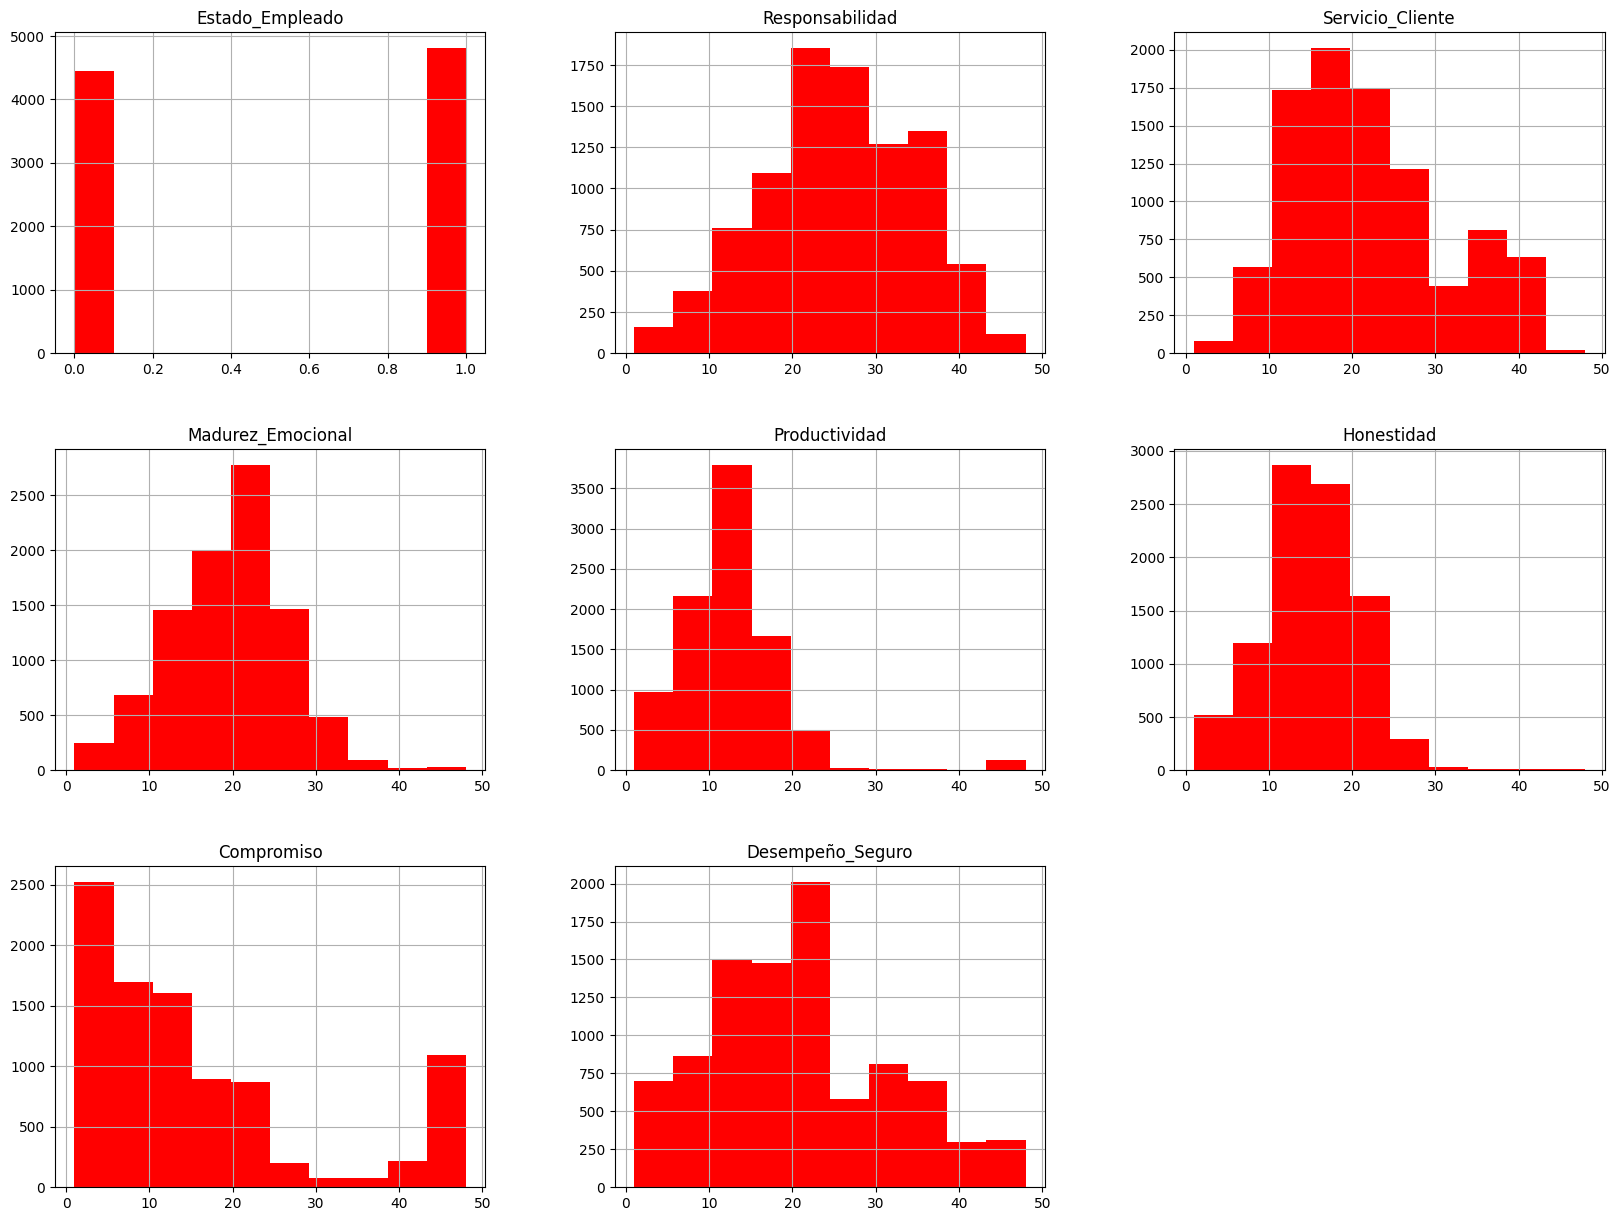

In [4]:
df.hist(figsize=(20,15), color = 'red')
plt.show()

In [5]:
df =pd.get_dummies(data =df)
df.head()

,Estado_Empleado,Responsabilidad,Servicio_Cliente,Madurez_Emocional,Productividad,Honestidad,Compromiso,Desempeño_Seguro,Genero_F,Genero_M,Tpo_Contrato_Fijo,Tpo_Contrato_Indefinido,ERI_DP,ERI_FP,ERI_NV,ERI_PS
0,0,42,25,20,10,23,21,37,0,1,1,0,0,0,0,1
1,0,16,11,31,14,8,3,15,0,1,1,0,0,0,0,1
2,0,33,22,21,13,22,20,42,0,1,1,0,0,0,0,1
3,0,24,21,25,17,21,7,17,0,1,1,0,0,0,0,1
4,0,40,23,31,48,25,40,23,1,0,1,0,0,0,0,1


### Normalizacion de los datos

In [6]:
# Normalización de los datos para el Df Activos y aplicamos el Reset al index ya que me puso valores diferentes sin la variable objetivo
df = (df-df.min())/(df.max()-df.min())
df.describe()

,Estado_Empleado,Responsabilidad,Servicio_Cliente,Madurez_Emocional,Productividad,Honestidad,Compromiso,Desempeño_Seguro,Genero_F,Genero_M,Tpo_Contrato_Fijo,Tpo_Contrato_Indefinido,ERI_DP,ERI_FP,ERI_NV,ERI_PS
count,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000
mean,0.520078,0.522057,0.448134,0.396621,0.247226,0.303929,0.314374,0.419260,0.278929,0.721071,0.743092,0.256908,0.486831,0.063795,0.002051,0.447323
std,0.499624,0.194718,0.196649,0.149686,0.138223,0.121801,0.309955,0.231203,0.448497,0.448497,0.436952,0.436952,0.499854,0.244401,0.045243,0.497244
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.382979,0.297872,0.297872,0.170213,0.234043,0.085106,0.255319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.531915,0.404255,0.404255,0.234043,0.319149,0.212766,0.404255,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.659574,0.574468,0.489362,0.319149,0.382979,0.404255,0.574468,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
x = df.loc[:,df.columns!='Estado_Empleado']
y = df['Estado_Empleado']
print(x.shape)
print(y.shape)

(9264, 15)
(9264,)


In [8]:
#Conjunto de datos en 70% (entrenamiento) y 30% (test) Utilizando la funcion train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=0)

## Entrenar Modelo DecisionTreeClassifier()

In [9]:
# Crear el modelo DecisionTreeClassifier sin pasar feature_names
model = DecisionTreeClassifier(criterion='gini', #entropy o (gini x defecto) m
                               max_depth=6, #ax-depth es la profundidad entre mas alto mas robabilidad de exactiud random_state qeu tengaos un punto especifico 
                               random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [10]:
y_pred = model.predict(x_test)

### Matrix de Confucion 

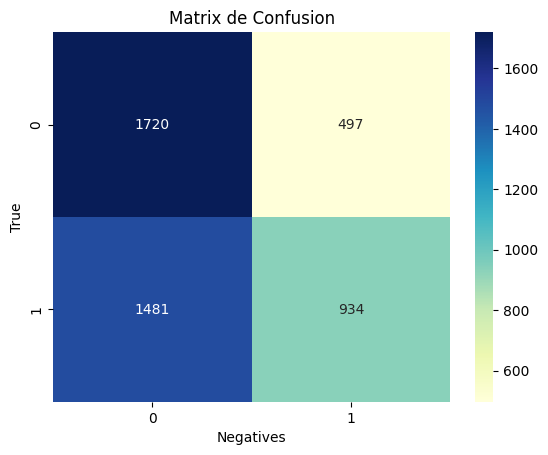

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Negatives')
plt.ylabel('True')
plt.title('Matrix de Confusion')
plt.show()

### Metricas para saber que tal funciona el modelo
* **Accuracy (Exactitud)**: Es una métrica que calcula la proporción de predicciones correctas realizadas por el modelo en relación con el total de predicciones. 
* **F1 Score:** El F1 Score es una métrica que combina la precisión (precision) y el recall (recuperación) de un modelo en un solo valor. Es útil cuando hay un desequilibrio entre las clases en los datos. El F1 Score es la media armónica de la precisión y el recall.
* **ROC (Receiver Operating Characteristic):** Es una curva que representa la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para diferentes umbrales de clasificación. La curva ROC proporciona información sobre el rendimiento de un clasificador binario a diferentes niveles de sensibilidad y especificidad.
* **Recall (Recuperación):** También conocido como sensibilidad o tasa de verdaderos positivos (TPR), es una métrica que mide la proporción de casos positivos que fueron correctamente identificados por el modelo en relación con el total de casos positivos reales.

In [12]:
accuracy_score(y_test, y_pred)

0.5729706390328152

In [13]:
#Metricas de Resultado
print("Accutracy: ", metrics.accuracy_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score (y_test, y_pred, average='weighted'))
print("ROC: ", metrics.roc_auc_score (y_test, y_pred ))
print("Recall: ", metrics.recall_score (y_test, y_pred,  average='weighted' ))

Accutracy:  0.5729706390328152
F1 Score:  0.5571207180880376
ROC:  0.5812863334425964
Recall:  0.5729706390328152


In [14]:
tree.export_graphviz(model, out_file='tree_staff_turnover')

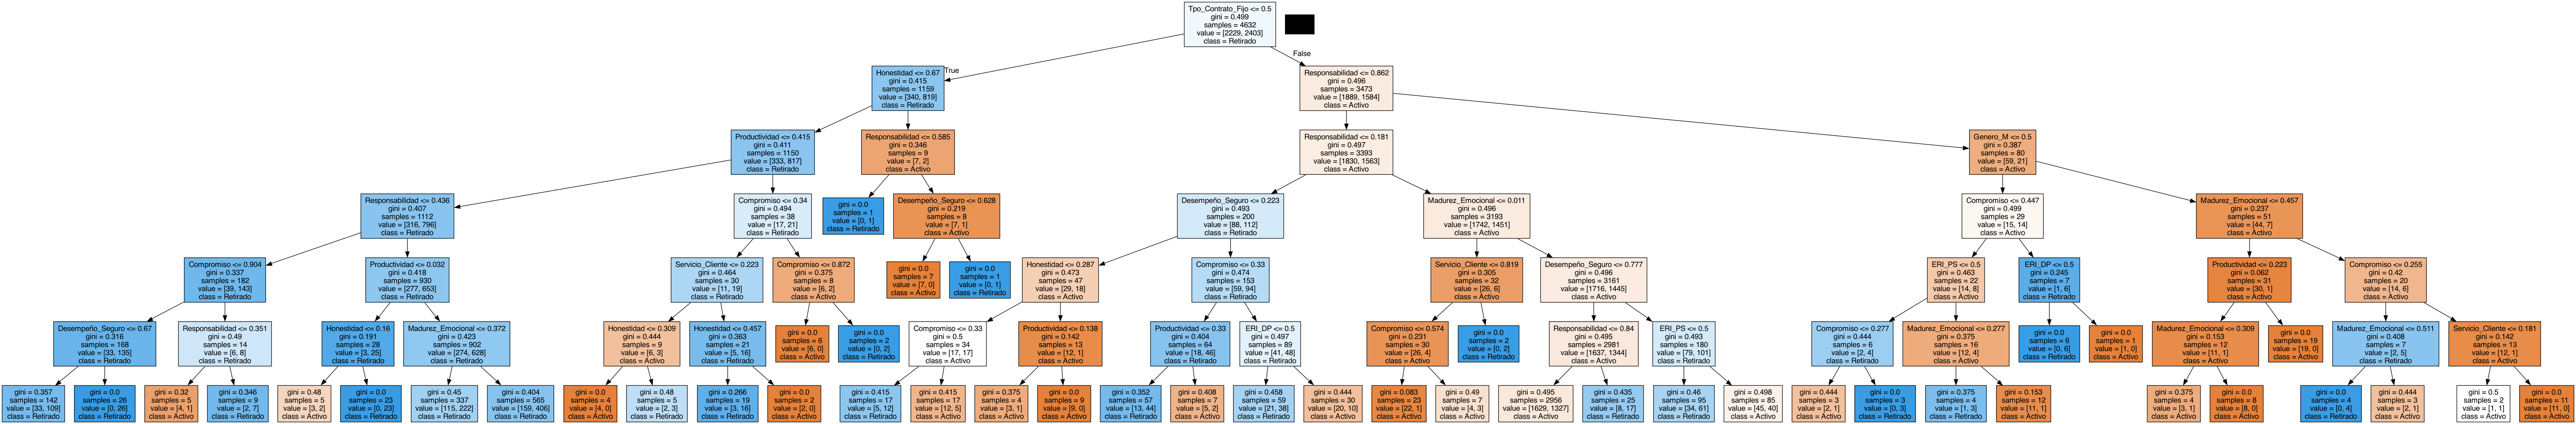

In [15]:
import pydotplus
dot_data1 = tree.export_graphviz(model,
                                 out_file = None,
                                 class_names = ['Activo', 'Retirado'],
                                 feature_names= list(df.drop(['Estado_Empleado'], axis=1)),
                                 filled=True)
graph = pydotplus.graph_from_dot_data(dot_data1)
Image(graph.create_png())

In [16]:
graph.write_png("tree_staff_turnover.png")

True